In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [2]:
window = 50
X, y, coeffs = make_regression(n_samples=1000, n_features=2, n_informative=2, noise=1., coef=True)

In [3]:
hat_betas = []

for start in range(X.shape[0] - window):
    reg = LinearRegression(fit_intercept=False)
    reg.fit(X[start:start+window,:], y[start:start+window])
    hat_betas.append(reg.coef_)

In [4]:
hat_beta1, hat_beta2 = zip(*hat_betas)

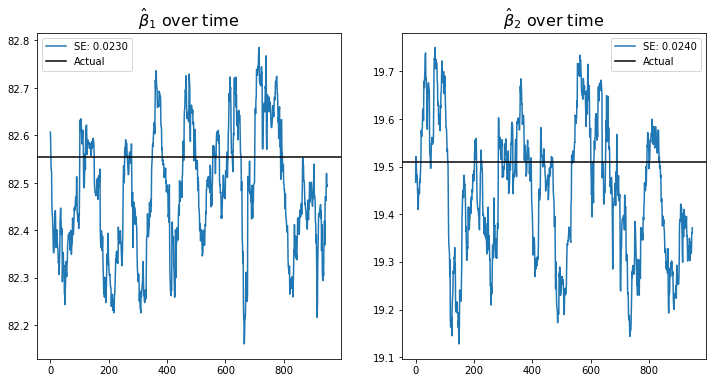

In [5]:
fig, ax = plt.subplots(figsize=(12, 6), ncols=2)

SE_beta1 = np.mean((np.array(hat_beta1) - coeffs[0])**2)

ax[0].plot(range(X.shape[0] - window), hat_beta1, label=f'SE: {SE_beta1:.4f}')
ax[0].axhline(coeffs[0], color='black', label='Actual')
ax[0].set_title(r'$\hat\beta_1$ over time', fontsize=16)
ax[0].legend()

SE_beta2 = np.mean((np.array(hat_beta2) - coeffs[1])**2)

ax[1].plot(range(X.shape[0] - window), hat_beta2, label=f'SE: {SE_beta2:.4f}')
ax[1].axhline(coeffs[1], color='black', label='Actual')
ax[1].set_title(r'$\hat\beta_2$ over time', fontsize=16)
ax[1].legend()

plt.show()